In [49]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
import matplotlib.pyplot as plt
from pyfrechet.metric_spaces import MetricData, RiemannianManifold, CorrFrobenius, MetricSpace
from geomstats.geometry.hypersphere import Hypersphere
import pandas as pd
from pyfrechet.metric_spaces.correlation.nearcorr import nearcorr
from tqdm import tqdm
import seaborn as sns
from joblib import Parallel, delayed
from scipy.stats import norm
from scipy import stats
from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

# R with multiplicative noise

In [50]:
def m(x, theta, mu):
    return theta * x + (1-theta)*mu

def sim(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        x[i] = m(x[i-1], theta, mu) + sig*np.random.randn()
    return x

def sim_mul(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        x[i] = (1 + sig*np.random.randn()) * m(x[i-1], theta, mu)
    return x


def sim_sin(N, theta, sig, mu):
    x = np.zeros(N) + mu
    for i in range(1,N):
        k = (1 - 2*np.random.binomial(1,0.5)) * np.random.random_integers(1, 4)
        z = m(x[i-1], theta, mu)
        x[i] = z - np.sin(np.pi*k*z)/np.pi/k
    return x

In [54]:
M = 1000 # number of replicates
B = 500 # number of bootstrap replicates

phis = np.linspace(0, 1, 6)
Ts = [50, 100, 250, 500, 1000, 1200]


df = pd.DataFrame(columns=['T', 'phi', 'replicate_id', 'err_mu_hat', 'phi_hat', 'Dt', 'boot_mean_Dt', 'boot_sig_Dt'])

mean = 1.5
noise_var = 0.2

def phi_hat(x, mu_hat):
    T = x.shape[0]
    grid = np.linspace(0, 1, 40)
    errs = np.zeros_like(grid)
    for i in range(grid.shape[0]): 
        errs[i] = np.array([ (x[j+1] - m(x[j], grid[i], mu_hat))**2 for j in range(T-1) ]).mean()
    return grid[np.argmin(errs)]

def bootstrap_mu_sig(x, B):
    bootstrap = np.zeros(B)
    for b in range(B):
        permed = np.random.permutation(x)
        bootstrap[b] = np.mean(np.power(np.diff(permed), 2))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat


for T in Ts:
    for phi in phis:
        print(f"Running T={T} phi={phi}")
        for replicate_id in tqdm(range(M)):
            x = sim_mul(T, phi, noise_var, mean)

            mu_hat = x.mean()
            phi_hat_ = phi_hat(x, mu_hat)

            Dt = np.mean(np.power(np.diff(x), 2))

            boot_mean_Dt, boot_sig_Dt = bootstrap_mu_sig(x, B)

            df.loc[len(df)] = [T, phi, replicate_id, (mean - mu_hat)**2, phi_hat_, Dt, boot_mean_Dt, boot_sig_Dt]

df.to_csv('./results_R_mult_noise_extended.csv')

Running T=50 phi=0.0


100%|██████████| 250/250 [00:01<00:00, 169.79it/s]


Running T=50 phi=0.2


100%|██████████| 250/250 [00:01<00:00, 179.74it/s]


Running T=50 phi=0.4


100%|██████████| 250/250 [00:01<00:00, 179.60it/s]


Running T=50 phi=0.6000000000000001


100%|██████████| 250/250 [00:01<00:00, 176.43it/s]


Running T=50 phi=0.8


100%|██████████| 250/250 [00:01<00:00, 179.57it/s]


Running T=50 phi=1.0


100%|██████████| 250/250 [00:01<00:00, 178.99it/s]


Running T=100 phi=0.0


100%|██████████| 250/250 [00:01<00:00, 141.82it/s]


Running T=100 phi=0.2


100%|██████████| 250/250 [00:01<00:00, 143.19it/s]


Running T=100 phi=0.4


100%|██████████| 250/250 [00:01<00:00, 143.07it/s]


Running T=100 phi=0.6000000000000001


100%|██████████| 250/250 [00:01<00:00, 144.47it/s]


Running T=100 phi=0.8


100%|██████████| 250/250 [00:01<00:00, 143.15it/s]


Running T=100 phi=1.0


100%|██████████| 250/250 [00:01<00:00, 144.91it/s]


Running T=250 phi=0.0


100%|██████████| 250/250 [00:02<00:00, 89.97it/s]


Running T=250 phi=0.2


100%|██████████| 250/250 [00:02<00:00, 88.57it/s]


Running T=250 phi=0.4


100%|██████████| 250/250 [00:02<00:00, 90.25it/s]


Running T=250 phi=0.6000000000000001


100%|██████████| 250/250 [00:02<00:00, 90.33it/s]


Running T=250 phi=0.8


100%|██████████| 250/250 [00:02<00:00, 90.18it/s]


Running T=250 phi=1.0


100%|██████████| 250/250 [00:02<00:00, 90.20it/s]


Running T=500 phi=0.0


100%|██████████| 250/250 [00:04<00:00, 56.41it/s]


Running T=500 phi=0.2


100%|██████████| 250/250 [00:04<00:00, 56.69it/s]


Running T=500 phi=0.4


100%|██████████| 250/250 [00:04<00:00, 56.42it/s]


Running T=500 phi=0.6000000000000001


100%|██████████| 250/250 [00:04<00:00, 56.45it/s]


Running T=500 phi=0.8


100%|██████████| 250/250 [00:04<00:00, 56.74it/s]


Running T=500 phi=1.0


100%|██████████| 250/250 [00:04<00:00, 56.77it/s]


Running T=1000 phi=0.0


100%|██████████| 250/250 [00:07<00:00, 32.43it/s]


Running T=1000 phi=0.2


100%|██████████| 250/250 [00:07<00:00, 32.46it/s]


Running T=1000 phi=0.4


100%|██████████| 250/250 [00:07<00:00, 32.42it/s]


Running T=1000 phi=0.6000000000000001


100%|██████████| 250/250 [00:07<00:00, 32.00it/s]


Running T=1000 phi=0.8


100%|██████████| 250/250 [00:07<00:00, 32.29it/s]


Running T=1000 phi=1.0


  0%|          | 0/250 [00:00<?, ?it/s] /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overflow encountered in multiply
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overflow encountered in multiply
  2%|▏         | 4/250 [00:00<00:07, 31.36it/s] /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overflow encountered in multiply
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overflow encountered in multiply
  3%|▎         | 8/250 [00:00<00:07, 30.85it/s] /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overflow encountered in multiply
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning:overfl

Running T=1200 phi=0.0


 84%|████████▍ | 210/250 [00:07<00:01, 26.55it/s]


KeyboardInterrupt: 

In [228]:
df = pd.read_csv('./results_R_mult_noise.csv')

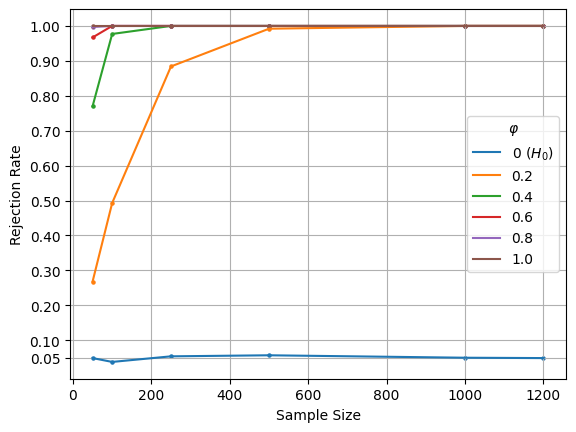

In [230]:
df['rejected'] = (np.abs(df['Dt'] - df['boot_mean_Dt']) / df['boot_sig_Dt']) > norm.ppf(0.975)
results = df.groupby(['T', 'phi']).agg(rejection_rate=('rejected', 'mean')).reset_index()

# sns.lineplot(results, x='T', y='rejection_rate', hue='phi')


for phi in results.phi.unique():
    sub_df = results[results['phi'] == phi]

    plt.scatter(sub_df['T'], sub_df.rejection_rate, s=5)
    if phi == 0:
        plt.plot(sub_df['T'], sub_df.rejection_rate, label=r'$0\ (H_0)$')
    else:
        plt.plot(sub_df['T'], sub_df.rejection_rate, label=np.round(phi,1))

plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.yticks([0.05,0.1,0.2,0.3,0.4,0.5,0.6,.7,.8,.9,1]);
# plt.xticks(df['T'].unique())

plt.savefig('./rejection_rates_R_mult_noise.pdf')

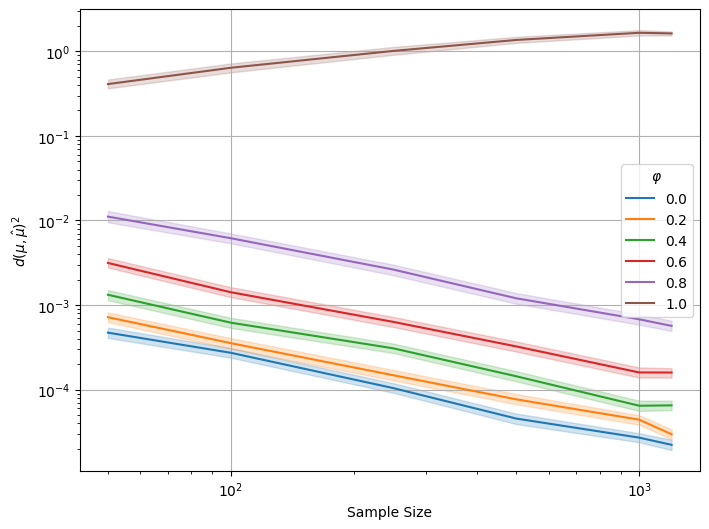

In [231]:
f, ax = plt.subplots(figsize=(8,6))
ax.set(xscale="log", yscale="log")

for phi in df.phi.unique():
    # if phi == 1:
    #     continue
    
    sub_df = df[df['phi'] == phi]

#     plt.scatter(sub_df['T'], sub_df., s=5)
    sns.lineplot(sub_df, x='T', y='err_mu_hat', label=np.round(phi,1))

plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.xlabel('Sample Size')
plt.ylabel(r'$d(\mu, \hat\mu)^2$')

plt.savefig('./err_mu_R_mult_noise_loglog.pdf')

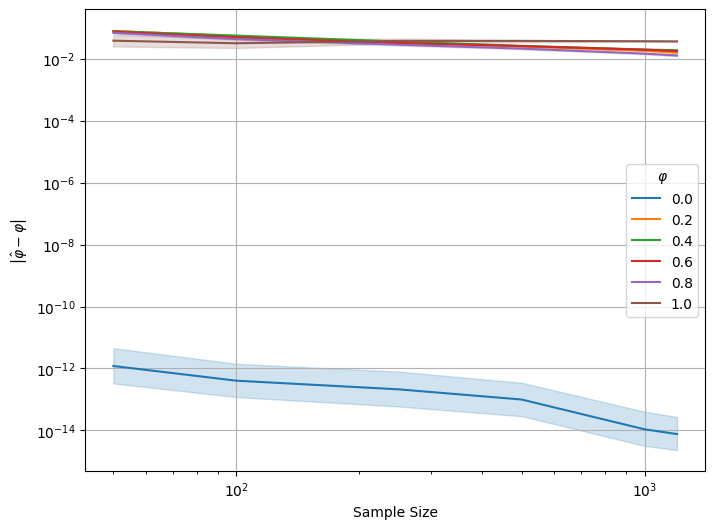

In [236]:
f, ax = plt.subplots(figsize=(8,6))
ax.set(xscale="log", yscale="log")

for phi in df.phi.unique():
    sub_df = df[df['phi'] == phi].copy()
    sub_df['err_phi_hat'] = np.abs(sub_df['phi_hat'] - phi) + 1e-20

#     plt.scatter(sub_df['T'], sub_df., s=5)
    sns.lineplot(sub_df, x='T', y='err_phi_hat', label=np.round(phi,1), ax=ax)

plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.xlabel('Sample Size')
plt.ylabel(r'$\left|\hat\varphi - \varphi\right|$')

plt.savefig('./err_phi_R_mult_noise.pdf')

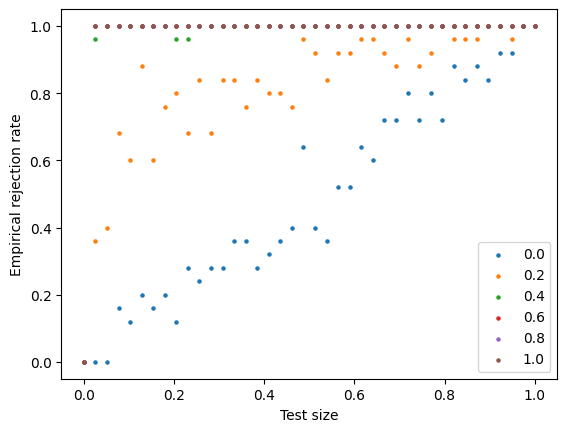

In [233]:
target_T = 100
true_size = np.linspace(0, 1, 40)



for phi in np.sort(df['phi'].unique()):
    sub_df = df[(df['T'] == target_T) & (df['phi'] == phi)].copy()
    _M = sub_df.shape[0]

    rejection_rate = (np.repeat((np.abs(sub_df['Dt'] - sub_df['boot_mean_Dt']) / sub_df['boot_sig_Dt']).values,true_size.shape[0]).reshape((true_size.shape[0], _M)) > np.repeat(norm.ppf(1 - true_size/2), _M).reshape((true_size.shape[0], _M))).mean(axis=1)

    plt.scatter(true_size, rejection_rate, label=f'{phi:.1f}', s=5)
plt.legend()
plt.xlabel('Test size')
plt.ylabel('Empirical rejection rate')

plt.savefig('./size_rej_rate_R_mult_noise.pdf')


100%|██████████| 1000/1000 [00:14<00:00, 70.89it/s]

% rejects under H1 1.0
% rejects under H0 0.062


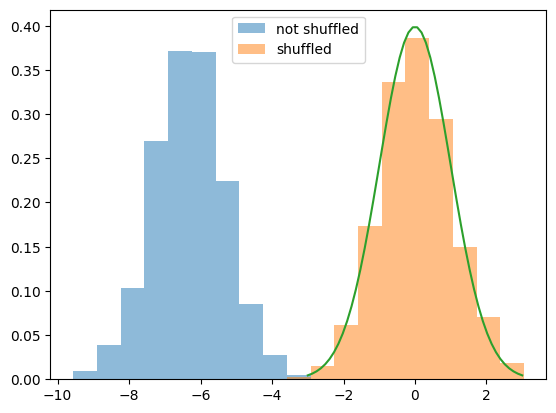

In [9]:
res = np.zeros((1000, 4))

mu = 1.5
theta = 0.2

N = 1_000
B = 500

def bootstrap_mu_sig(x, B):
    # DIRECT ESTIMATION - check this a bit more
    #
    # D_XY_XZ = np.zeros((2, B))
    # for b in range(B):
    #     idx = np.random.randint(N, size=3)
    #     D_XY_XZ[0, b] = np.abs(x[idx[0]] - x[idx[1]])
    #     D_XY_XZ[1, b] = np.abs(x[idx[0]] - x[idx[2]])

    # cov = np.cov(D_XY_XZ)
    # sig_hat = np.sqrt(cov[0,0] + 2*cov[0,1]) / np.sqrt(B)
    # mu_hat = D_XY_XZ[0,:].mean()

    # BOOTSTRAP VERSION
    # 
    bootstrap = np.zeros(B)
    for b in range(B):
        permed = np.random.permutation(x)
        # bootstrap[b] = np.mean(np.abs(np.diff(permed)))
        bootstrap[b] = np.mean(np.power(np.diff(permed), 2))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat

for i in tqdm(range(res.shape[0])):
    x = sim_mul(N, theta, 0.13, mu)
    
    # res[i,0] = np.mean(np.abs(np.diff(x)))
    res[i,0] = np.mean(np.power(np.diff(x), 2))

    permed = np.random.permutation(x)
    # res[i,1] =  np.mean(np.abs(np.diff(permed)))
    res[i,1] = np.mean(np.power(np.diff(permed), 2))

    mu_hat, sig_hat = bootstrap_mu_sig(x, B)
    res[i, 2] = mu_hat
    res[i, 3] = sig_hat

plt.hist((res[:, 0] - res[:, 2]) / res[:, 3], label='not shuffled', alpha=0.5, density=True)
plt.hist((res[:, 1] - res[:, 2]) / res[:, 3], label='shuffled', alpha=0.5, density=True)

_x = np.linspace(-3, 3)
plt.plot(_x, norm.pdf(_x))

print("% rejects under H1", (np.abs((res[:, 0] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())
print("% rejects under H0", (np.abs((res[:, 1] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())

plt.legend()


# Wasserstein

In [47]:
def gamma(x, theta, mu):
    # the rvs are represented as their quantile functions, so interpolation is euclidean
    return theta * x + (1-theta)*mu

def sim(N, theta, mu):
    x = np.zeros((N, mu.shape[0])) + mu
    for i in range(1,N):
        z = gamma(x[i-1], theta, mu)

        k = (1 - 2*np.random.binomial(1,0.5)) * np.random.random_integers(1, 4)
        x[i, :] = z - np.sin(np.pi*k*z)/np.pi/abs(k)
    return x

M = 1000 # number of replicates
B = 500 # number of bootstrap replicates

phis = np.linspace(0, 1, 6)
Ts = [50, 100, 250, 500, 1000, 1200]
# Ts = [100, 500, 1000]

df = pd.DataFrame(columns=['T', 'phi', 'replicate_id', 'err_mu_hat', 'phi_hat', 'Dt', 'boot_mean_Dt', 'boot_sig_Dt'])

STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
mean = STD_NORMAL_Q

def phi_hat(x, mu_hat):
    T = x.shape[0]
    W = W1d.Wasserstein1D()

    grid = np.linspace(0, 1, 40)

    def calc(phi): return np.array([ W._d(x[j+1,:], gamma(x[j,:], phi, mu_hat))**2 for j in range(T-1) ]).mean()
    errs = np.array([ calc(phi) for phi in grid ])
    
    return grid[np.argmin(errs)]

def bootstrap_mu_sig(x, B):
    bootstrap = np.zeros(B)
    for b in range(B):
        permed = np.random.permutation(np.arange(x.shape[0]))
        bootstrap[b] = np.array([ W._d(x[permed[j],:], x[permed[j+1],:])**2 for j in range(T-1) ]).mean()
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat


for T in Ts:
    for phi in phis:
        print(f"Running T={T} phi={phi}")
        for replicate_id in tqdm(range(M)):
            x = sim(T, phi, mean)

            W = W1d.Wasserstein1D()
            mu_hat = MetricData(W, x).frechet_mean()

            phi_hat_ = phi_hat(x, mu_hat)

            Dt = np.array([ W._d(x[j,:], x[j+1,:])**2 for j in range(T-1) ]).mean()
            
            boot_mean_Dt, boot_sig_Dt = bootstrap_mu_sig(x, B)

            df.loc[len(df)] = [T, phi, replicate_id, W._d(mean, mu_hat)**2, phi_hat_, Dt, boot_mean_Dt, boot_sig_Dt]

        df.to_csv('./results_wasserstein_full.csv')

Running T=50 phi=0.0


100%|██████████| 1000/1000 [02:59<00:00,  5.58it/s]


Running T=50 phi=0.2


100%|██████████| 1000/1000 [02:58<00:00,  5.59it/s]


Running T=50 phi=0.4


100%|██████████| 1000/1000 [02:59<00:00,  5.58it/s]


Running T=50 phi=0.6000000000000001


100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]


Running T=50 phi=0.8


100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]


Running T=50 phi=1.0


100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]


Running T=100 phi=0.0


100%|██████████| 1000/1000 [08:40<00:00,  1.92it/s]


Running T=100 phi=0.2


100%|██████████| 1000/1000 [08:47<00:00,  1.90it/s]


Running T=100 phi=0.4


100%|██████████| 1000/1000 [08:45<00:00,  1.90it/s]


Running T=100 phi=0.6000000000000001


100%|██████████| 1000/1000 [09:05<00:00,  1.83it/s]


Running T=100 phi=0.8


100%|██████████| 1000/1000 [09:12<00:00,  1.81it/s]


Running T=100 phi=1.0


100%|██████████| 1000/1000 [09:13<00:00,  1.81it/s]


Running T=250 phi=0.0


100%|██████████| 1000/1000 [18:28<00:00,  1.11s/it]


Running T=250 phi=0.2


100%|██████████| 1000/1000 [18:45<00:00,  1.13s/it]


Running T=250 phi=0.4


100%|██████████| 1000/1000 [18:51<00:00,  1.13s/it]


Running T=250 phi=0.6000000000000001


100%|██████████| 1000/1000 [19:55<00:00,  1.20s/it]


Running T=250 phi=0.8


100%|██████████| 1000/1000 [19:31<00:00,  1.17s/it]


Running T=250 phi=1.0


100%|██████████| 1000/1000 [19:11<00:00,  1.15s/it]


Running T=500 phi=0.0


100%|██████████| 1000/1000 [51:04<00:00,  3.06s/it]


Running T=500 phi=0.2


100%|██████████| 1000/1000 [1:05:11<00:00,  3.91s/it]


Running T=500 phi=0.4


 48%|████▊     | 477/1000 [20:46<22:46,  2.61s/it]  


KeyboardInterrupt: 

In [238]:
df = pd.read_csv('./results_wasserstein_merged.csv')
df['phi'] = df['phi'].map({ 0.6: 0.6000000000000001 }).fillna(df['phi'])

In [201]:
# filenames = ['87395_results_wasserstein_full.csv', '86982_results_wasserstein_full.csv', '83198_results_wasserstein_full.csv', '80721_results_wasserstein_full.csv', '66778_results_wasserstein_full.csv', '55485_results_wasserstein_full.csv', '48339_results_wasserstein_full.csv', '3576_results_wasserstein_full.csv', '8423_results_wasserstein_full.csv', '41221_results_wasserstein_full.csv', '82802_results_wasserstein_full.csv', '89859_results_wasserstein_full.csv']

# df = pd.read_csv('./results_wasserstein_full.csv')
# for filename in filenames:
#     df = pd.concat([df, pd.read_csv(filename)])
# df.to_csv('results_wasserstein_merged.csv')

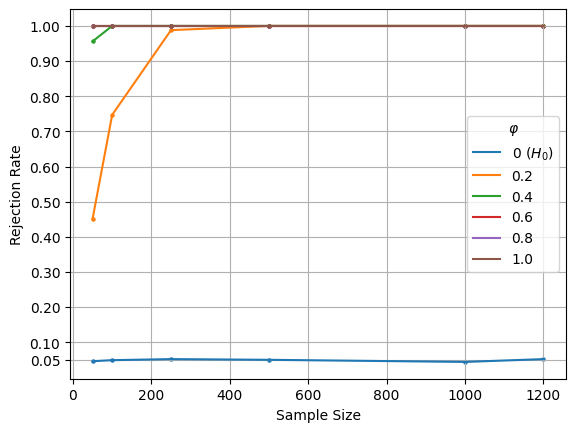

In [239]:
df['rejected'] = (np.abs(df['Dt'] - df['boot_mean_Dt']) / df['boot_sig_Dt']) > norm.ppf(0.975)
results = df.groupby(['T', 'phi']).agg(rejection_rate=('rejected', 'mean')).reset_index()

# sns.lineplot(results, x='T', y='rejection_rate', hue='phi')


for phi in results.phi.unique():
    sub_df = results[results['phi'] == phi]

    plt.scatter(sub_df['T'], sub_df.rejection_rate, s=5)
    if phi == 0:
        plt.plot(sub_df['T'], sub_df.rejection_rate, label=r'$0\ (H_0)$')
    else:
        plt.plot(sub_df['T'], sub_df.rejection_rate, label=np.round(phi,1))

plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.yticks([0.05,0.1,0.2,0.3,0.4,0.5,0.6,.7,.8,.9,1]);
# plt.xticks(df['T'].unique())

plt.savefig('./rejection_rates_wasserstein.pdf')

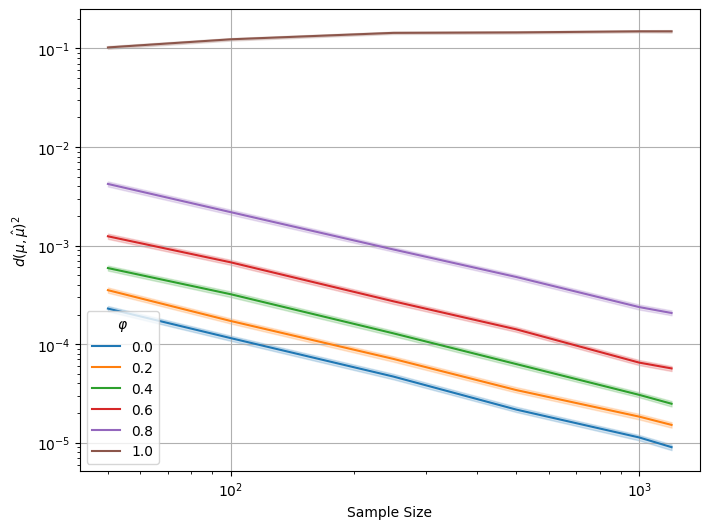

In [240]:
f, ax = plt.subplots(figsize=(8,6))
ax.set(xscale="log", yscale="log")

for phi in df.phi.unique():
    sub_df = df[df['phi'] == phi]
    sns.lineplot(sub_df, x='T', y='err_mu_hat', label=np.round(phi,1), ax=ax)

plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.xlabel('Sample Size')
plt.ylabel(r'$d(\mu, \hat\mu)^2$')

plt.savefig('./err_mu_wasserstein.pdf')

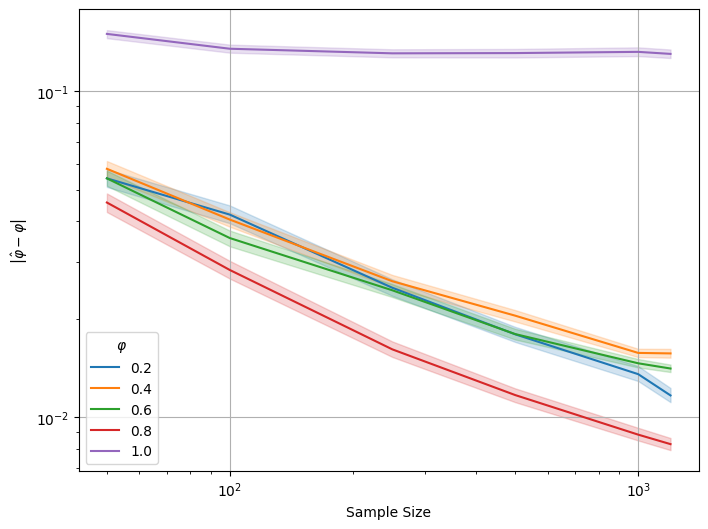

In [254]:
fig, ax = plt.subplots(figsize=(8,6))
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
# fig.subplots_adjust(hspace=0.05)  # adjust space between axes
# ax1.set(xscale="log", yscale="log")
# ax2.set(xscale="log", yscale="log")
ax.set(xscale="log", yscale="log")

for phi in df.phi.unique():
    if phi == 0:
        continue
    sub_df = df[df['phi'] == phi].copy()
    sub_df['err_phi_hat'] = np.abs(sub_df['phi_hat'] - phi) + 1e-20
    sns.lineplot(sub_df, x='T', y='err_phi_hat', label=np.round(phi,1), ax=ax)
    # if phi == 0:
    #     # continue
    #     sns.lineplot(sub_df, x='T', y='err_phi_hat', label=np.round(phi,1), ax=ax2)
    # else:
    #     sns.lineplot(sub_df, x='T', y='err_phi_hat', label=np.round(phi,1), ax=ax1)

plt.legend(title=r'$\varphi$')
plt.grid('on')
plt.xlabel('Sample Size')
plt.ylabel(r'$\left|\hat\varphi - \varphi\right|$')

# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .5  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.savefig('./err_phi_wasserstein.pdf')

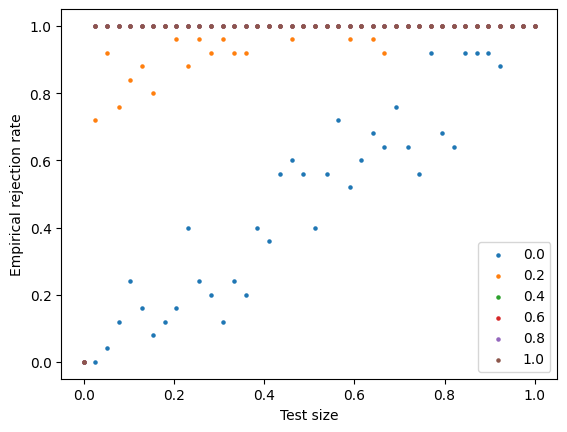

In [223]:
target_T = 100
true_size = np.linspace(0, 1, 40)

for phi in np.sort(df['phi'].unique()):
    sub_df = df[(df['T'] == target_T) & (df['phi'] == phi)].copy()
    _M = sub_df.shape[0]

    rejection_rate = (np.repeat((np.abs(sub_df['Dt'] - sub_df['boot_mean_Dt']) / sub_df['boot_sig_Dt']).values,true_size.shape[0]).reshape((true_size.shape[0], _M)) > np.repeat(norm.ppf(1 - true_size/2), _M).reshape((true_size.shape[0], _M))).mean(axis=1)

    plt.scatter(true_size, rejection_rate, label=f'{phi:.1f}', s=5)
plt.legend()
plt.xlabel('Test size')
plt.ylabel('Empirical rejection rate')

plt.savefig('./size_rej_rate_wasserstein.pdf')


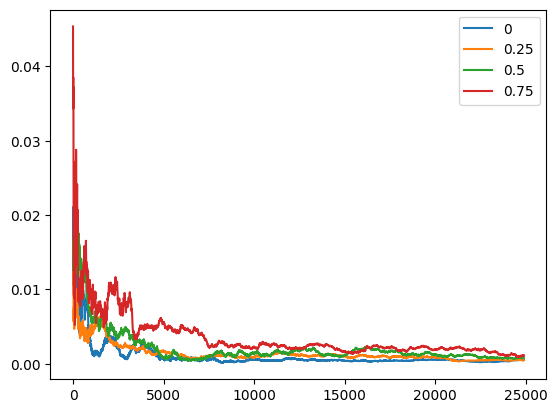

In [316]:


def gamma(x, theta, mu):
    # the rvs are represented as their quantile functions, so interpolation is euclidean
    return theta * x + (1-theta)*mu

def sim(N, theta, mu):
    x = np.zeros((N, mu.shape[0])) + mu
    for i in range(1,N):
        z = gamma(x[i-1], theta, mu)

        k = (1 - 2*np.random.binomial(1,0.5)) * np.random.random_integers(1, 4)
        x[i, :] = z - np.sin(np.pi*k*z)/np.pi/abs(k)
    return x

STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs


N = 25_000
thetas = [0, 0.25, 0.5, 0.75]
mu = STD_NORMAL_Q

for j in range(len(thetas)):
    theta = thetas[j]
    x = sim(N, theta, mu)

    M = W1d.Wasserstein1D()

    mu_hats = np.zeros_like(x)
    errs = np.zeros(N)
    for i in range(2,N):
        mu_hats[i,:] = MetricData(M, x[:i,:]).frechet_mean()
        errs[i] = M.d(mu, mu_hats[i,:])

    plt.plot(errs[100:], label=theta)

plt.legend()


100%|██████████| 100/100 [00:01<00:00, 52.22it/s]


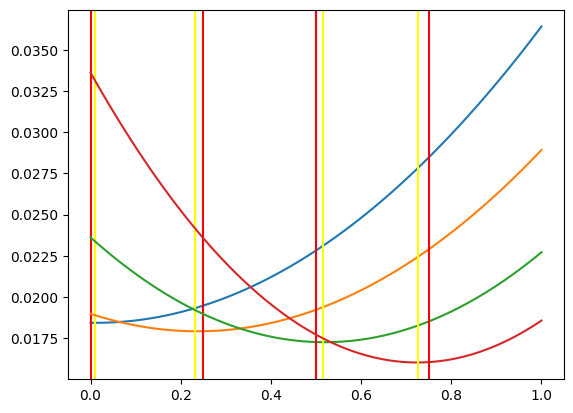

In [318]:
tgrid = np.linspace(0,1,100)

N = 1_000
thetas = [0, 0.25, 0.5, 0.75]
mu = STD_NORMAL_Q

for j in range(len(thetas)):
    theta = thetas[j]
    x = sim(N, theta, mu)

    M = W1d.Wasserstein1D()
    mu_hat = MetricData(M, x).frechet_mean()
    def calc(_theta): return np.array([ M._d(gamma(x[j-1,:], _theta, mu_hat), x[j,:])**2 for j in range(1, N) ]).mean()

    errs = np.array([ calc(tgrid[i]) for i in tqdm(range(tgrid.shape[0])) ])
    plt.plot(tgrid, errs, label=theta)
    plt.axvline(theta, color='red', label=theta)
    plt.axvline(tgrid[np.argmin(errs)], color='yellow', label=theta)



# tgrid = np.linspace(0,1,100)
# def calc(_theta): return np.array([ M._d(gamma(x[j-1,:], _theta, mu_hat), x[j,:])**2 for j in range(1, N) ]).mean()
# errs = np.array([ calc(tgrid[i]) for i in tqdm(range(tgrid.shape[0])) ])

# plt.plot(tgrid, errs)
# plt.axvline(theta, color='red')
# plt.axvline(tgrid[np.argmin(errs)], color='yellow')

100%|██████████| 1000/1000 [17:39<00:00,  1.06s/it]

% rejects under H1 1.0
% rejects under H0 0.054


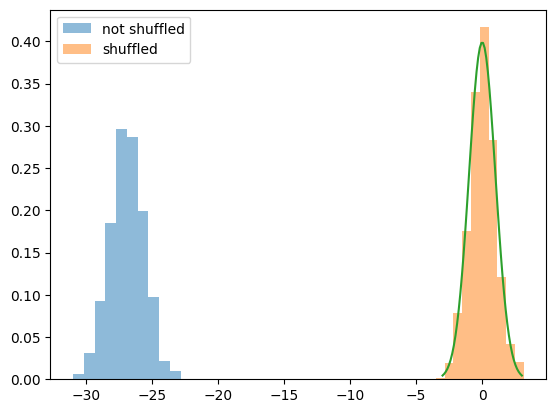

In [303]:
def Dn(x):
    # faster to do by hand to get vectorization
    return np.sqrt(np.sum(np.power(np.diff(x, axis=0), 2), axis=1)).mean() * np.sqrt(W1d.Wasserstein1D.GRID[1] - W1d.Wasserstein1D.GRID[0])

def bootstrap_mu_sig(x, B):
    # DIRECT ESTIMATION - check this a bit more
    #
    # D_XY_XZ = np.zeros((2, B))
    # for b in range(B):
    #     idx = np.random.randint(N, size=3)
    #     D_XY_XZ[0, b] = np.abs(x[idx[0]] - x[idx[1]])
    #     D_XY_XZ[1, b] = np.abs(x[idx[0]] - x[idx[2]])

    # cov = np.cov(D_XY_XZ)
    # sig_hat = np.sqrt(cov[0,0] + 2*cov[0,1]) / np.sqrt(B)
    # mu_hat = D_XY_XZ[0,:].mean()

    # BOOTSTRAP VERSION
    # 

    # def boot():
    #     return Dn(np.random.permutation(x))

    # bootstrap = np.array(Parallel(n_jobs=-1)(delayed(boot)() for i in range(B)))

    bootstrap = np.zeros(B)
    for b in range(B):
        bootstrap[b] = Dn(np.random.permutation(x))
    
    sig_hat = np.sqrt(bootstrap.var())
    mu_hat = bootstrap.mean()
    
    return mu_hat, sig_hat


res = np.zeros((1000, 4))

N = 1_000
B = 1_000

theta = 0.5
mu = STD_NORMAL_Q

for i in tqdm(range(res.shape[0])):
    x = sim(N, theta, mu)
    
    res[i,0] = Dn(x)

    permed = np.random.permutation(x)
    res[i,1] = Dn(permed)

    mu_hat, sig_hat = bootstrap_mu_sig(x, B)
    res[i, 2] = mu_hat
    res[i, 3] = sig_hat

plt.hist((res[:, 0] - res[:, 2]) / res[:, 3], label='not shuffled', alpha=0.5, density=True)
plt.hist((res[:, 1] - res[:, 2]) / res[:, 3], label='shuffled', alpha=0.5, density=True)

_x = np.linspace(-3, 3)
plt.plot(_x, norm.pdf(_x))

print("% rejects under H1", (np.abs((res[:, 0] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())
print("% rejects under H0", (np.abs((res[:, 1] - res[:, 2]) / res[:, 3]) > norm.ppf(0.975)).mean())

plt.legend()

